## Importing all libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load Simulation Results
This block loads all '.csv' files generated by the simulation and combines themo into a single dataframe 'df_all'.

In [12]:
data_folder = "../data_analisys"

csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]
dataframes = []

for file in csv_files:
    df = pd.read_csv(os.path.join(data_folder, file))
    df['simulation'] = file
    dataframes.append(df)
    
df_all = pd.concat(dataframes, ignore_index=True)
df_all.head()

,Clients,Branch,Arrival,Start,Waitint Time,Operation,Quantity,Step,Balance,Risk,simulation
0,Client 10,Bank Branch A,0.0,0.0,0.0,Invest,4831,1,349.0,100.00,simulation_10_200_5000.csv
1,Client 9,Bank Branch C,0.0,0.0,0.0,Loan,4762,1,8524.0,20.60,simulation_10_200_5000.csv
2,Client 10,Bank Branch A,0.0,0.0,0.0,Loan,865,1,1214.0,83.65,simulation_10_200_5000.csv
3,Client 4,Bank Branch B,0.0,0.0,0.0,Invest,4545,1,1393.0,100.00,simulation_10_200_5000.csv
4,Client 6,Bank Branch B,0.0,0.0,0.0,Retire,4534,1,3444.0,NaN,simulation_10_200_5000.csv


## Validate and Clean the Data
This block ensures that numerical values are properly converted to numeric format.

In [13]:
df_all['Risk'] = pd.to_numeric(df_all['Risk'], errors='coerce')
df_all['Quantity'] = pd.to_numeric(df_all['Quantity'], errors='coerce')
df_all['Balance'] = pd.to_numeric(df_all['Balance'], errors='coerce')
df_all['Branch_code'] = df_all['Branch'].astype('category').cat.codes

## Risk Evolution by Branch Over Time
This line plot displays how the average risk of operations changes over the simulation steps for each bank branch.

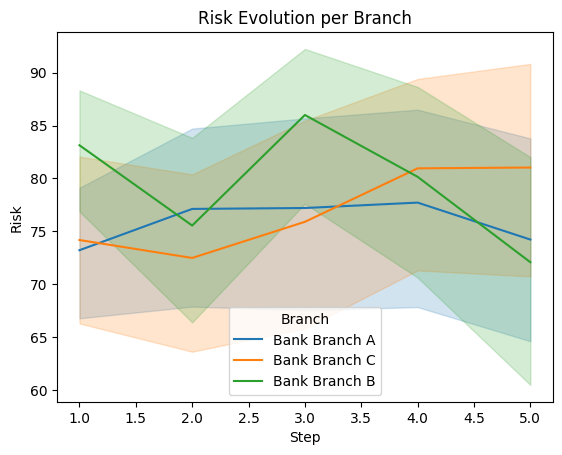

In [14]:
sns.lineplot(data=df_all, x='Step', y='Risk', hue='Branch')
plt.title("Risk Evolution per Branch")
plt.show()

## Risk Distribution per Operation Type
This boxplot compares the distribution of risk scores depending on the type of operation performed.

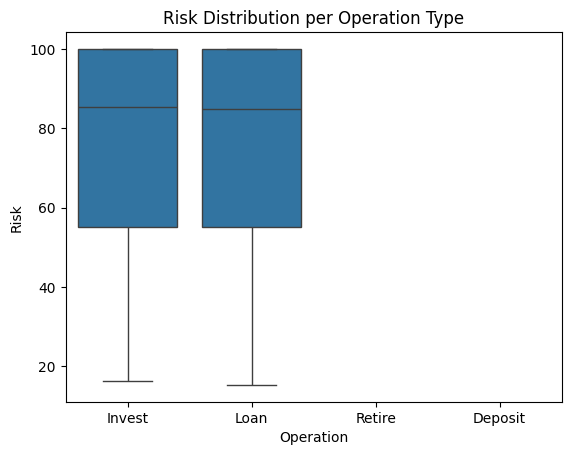

In [15]:
sns.boxplot(data = df_all, x='Operation', y='Risk')
plt.title("Risk Distribution per Operation Type")
plt.show()

## Average Risk and Quantity per Branch
This bar chart compares the average operation amount and risk per bank branch.

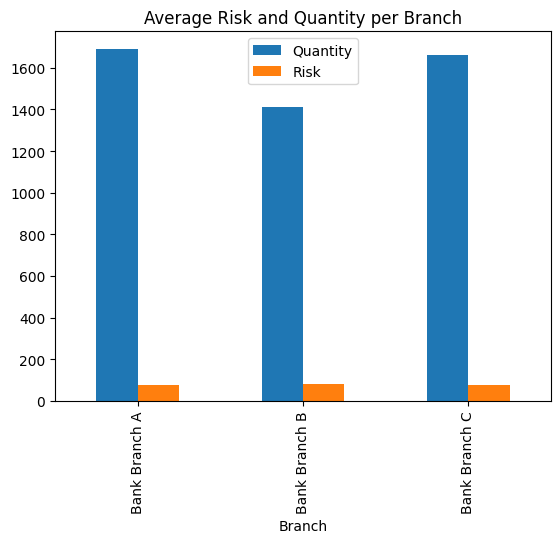

In [16]:

df_grouped = df_all.groupby('Branch')[['Quantity', 'Risk']].mean().reset_index()
df_grouped.plot(x='Branch', kind='bar')
plt.title("Average Risk and Quantity per Branch")
plt.show()

## Overall Risk Distribution
This histogram shows the distribution of risk levels across all operations in all simuations.

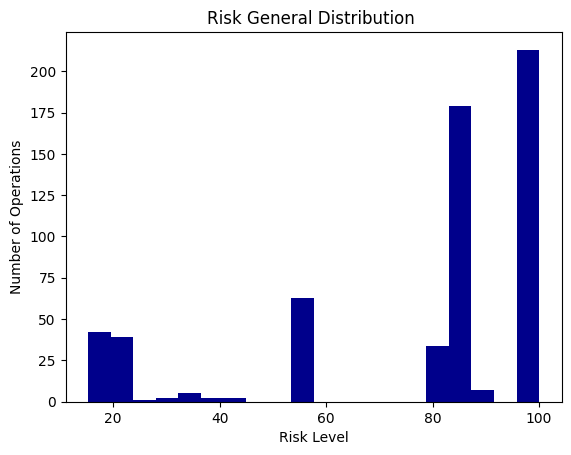

In [17]:
plt.hist(df_all['Risk'].dropna(), bins = 20, color = 'darkblue')
plt.title("Risk General Distribution ")
plt.xlabel('Risk Level')
plt.ylabel('Number of Operations')
plt.show()

## Correlation Heatmap
This heatmap shows correlations between numerical variables like 'Quantity', 'Risk' 'Balance' and 'Step'.

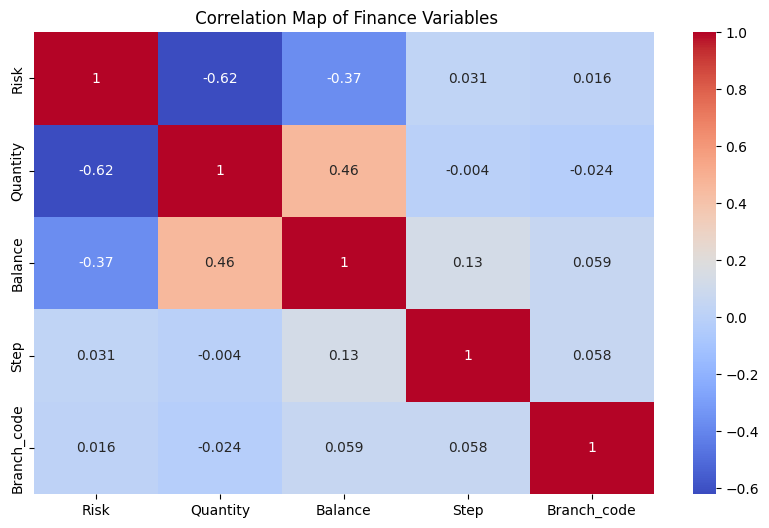

In [18]:
heatmap_data = df_all[['Risk', 'Quantity', 'Balance', 'Step', 'Branch_code']].dropna()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Map of Finance Variables")
plt.show()

## Comparison Between Simulations
This bar chart shows the average risk and final balance for each simulation scenario.

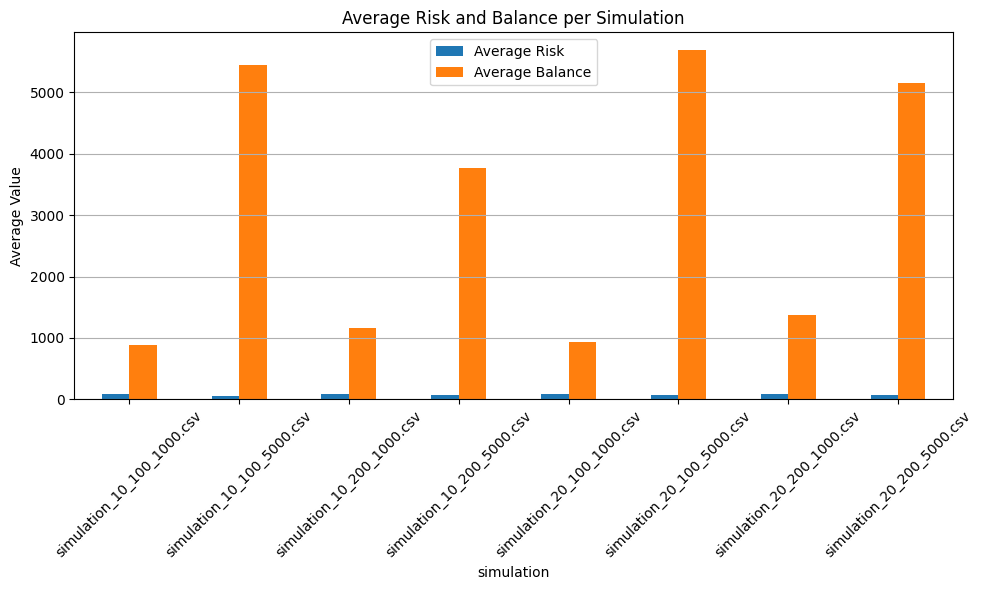

In [19]:
df_all['Risk'] = pd.to_numeric(df_all['Risk'], errors='coerce')
df_all['Balance'] = pd.to_numeric(df_all['Balance'], errors='coerce')

df_sim_summary = df_all.groupby('simulation')[['Risk', 'Balance']].mean().reset_index()

ax = df_sim_summary.plot(x='simulation', kind='bar', figsize=(10, 6))
plt.title("Average Risk and Balance per Simulation")
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(['Average Risk', 'Average Balance'])
plt.tight_layout()
plt.show()